# Basic Data preparation

## 1.import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

## 2. input the data with basic information

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,Female,80.00,0,1,never,25.19,6.60,140,0
1,2,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,3,Male,28.00,0,0,never,27.32,5.70,158,0
3,4,Female,36.00,0,0,current,23.45,5.00,155,0
4,5,Male,76.00,1,1,current,20.14,4.80,155,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  float64
 3   hypertension         100000 non-null  int64  
 4   heart_disease        100000 non-null  int64  
 5   smoking_history      100000 non-null  object 
 6   bmi                  100000 non-null  float64
 7   HbA1c_level          100000 non-null  float64
 8   blood_glucose_level  100000 non-null  int64  
 9   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [5]:
data.describe()

,ID,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,50000.50,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,28867.66,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,1.00,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,25000.75,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,50000.50,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,75000.25,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,100000.00,80.00,1.00,1.00,95.69,9.00,300.00,1.00


## 3. data visualization

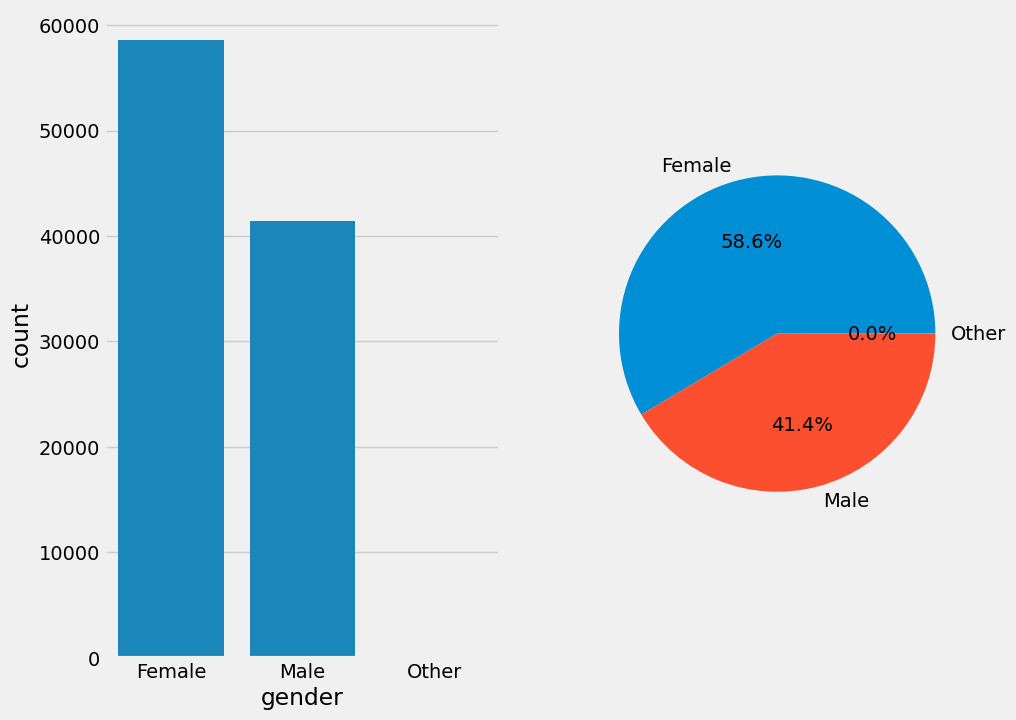

In [6]:
labels = ['Female', 'Male', 'Other']
values = data['gender'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=data['gender'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('FirstImage')
plt.show()

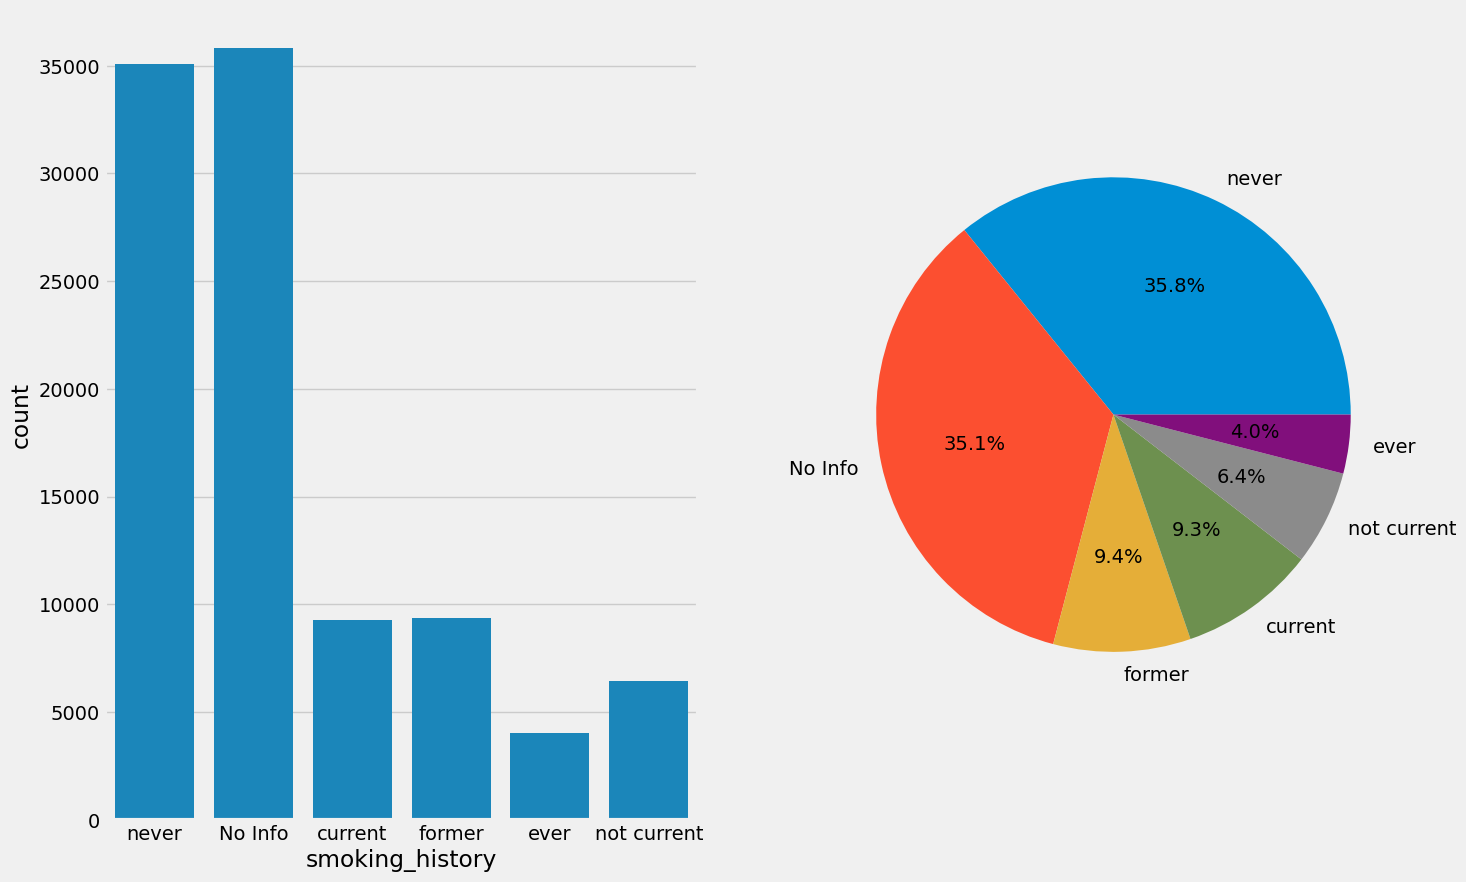

In [7]:
labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = data['smoking_history'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x=data['smoking_history'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('Image')
plt.show()

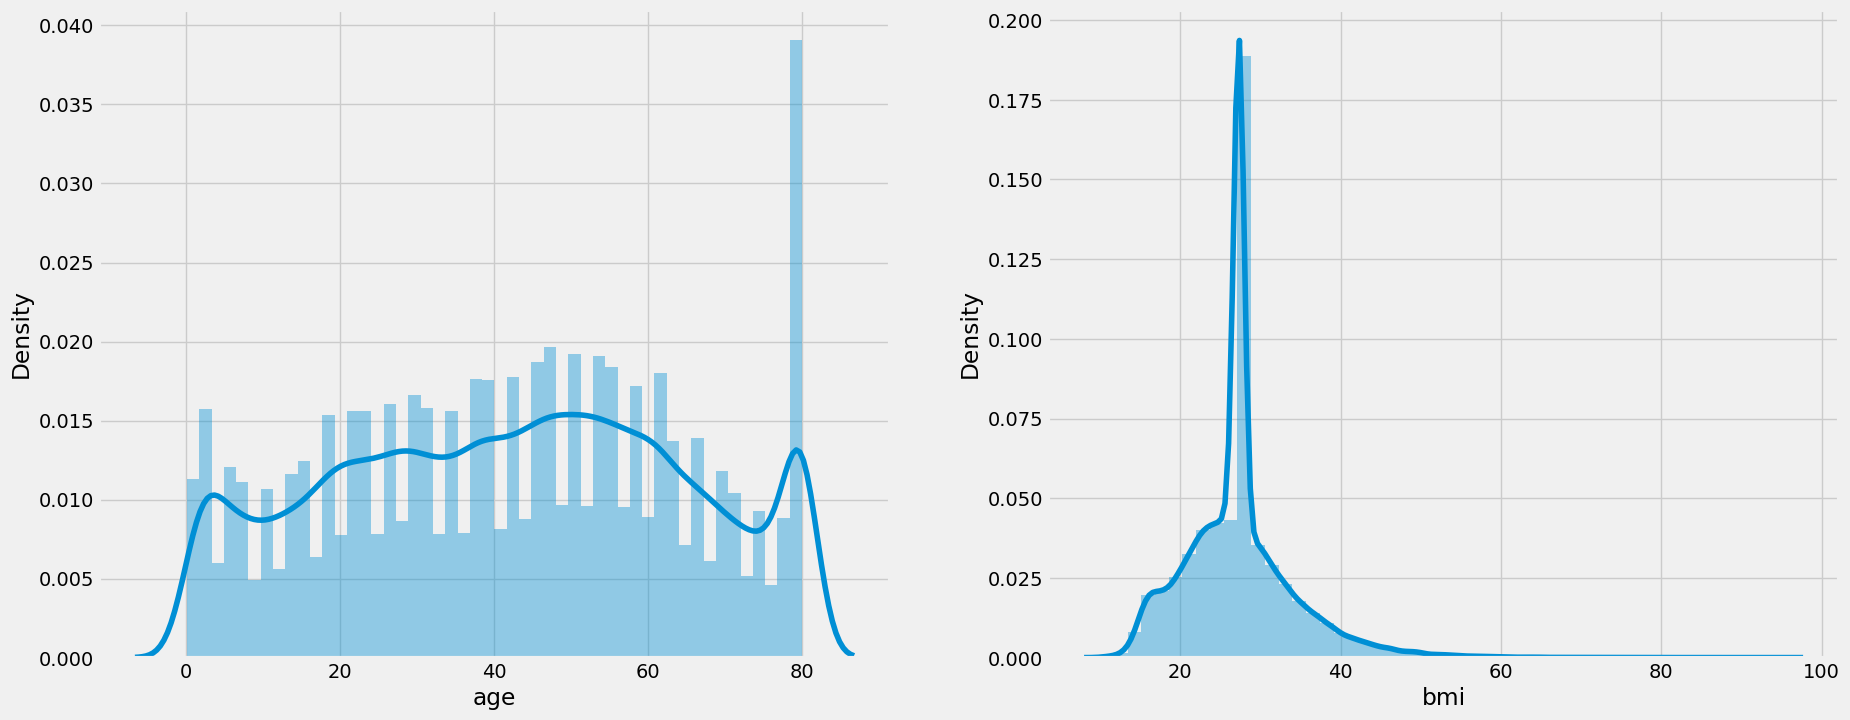

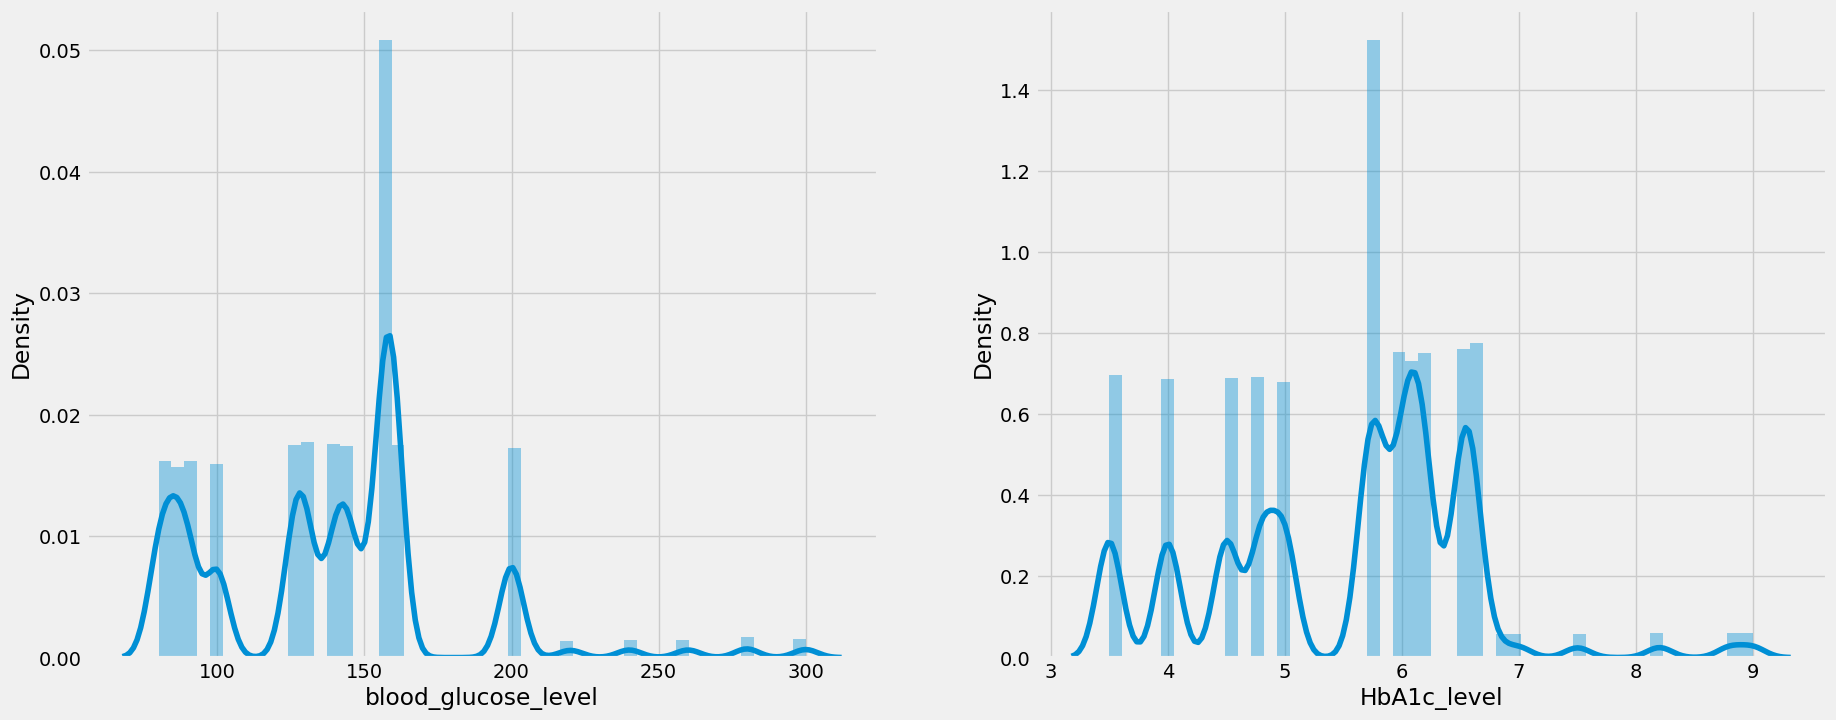

<Figure size 640x480 with 0 Axes>

In [8]:
numerical = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
i = 0

while i < 4:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  sns.distplot(data[numerical[i]])
  i += 1
  if i == 4:
    break
  plt.subplot(1, 2, 2)
  sns.distplot(data[numerical[i]])
  i += 1
  plt.show()

plt.savefig('2')

# Exploratory Data Analysis

*   should we delete some columns to choose more meaningful features or just keep?
*   should we cut the outliers?




## 1. Data Quality

### 1.1 Dealing with duplicate data



In [9]:
duplicate_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_data.shape)

number of duplicate rows:  (0, 10)


In [10]:
# Drop the dulication
data = data.drop_duplicates()

### 1.2 Dealing with unique data

In [11]:
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

ID: 100000 distinct values
gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [12]:
# Remove unusual clarrify
data = data[data['gender'] != 'Other']

### 1.3 Checking missing values

In [13]:
# Checking null values
print(data.isnull().sum())

ID                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### 1.4 Handling outliers



In [14]:
numeric_columns = ['bmi']

for column_name in numeric_columns:
    Q1 = np.percentile(data[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(data[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = data[(data[column_name] < low_lim) | (data[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    data[column_name] = np.where(data[column_name] < low_lim, low_lim, data[column_name])
    data[column_name] = np.where(data[column_name] > up_lim, up_lim, data[column_name])

## 2.0 Handling Variable smoking_history

We found that smoking_history has 35% data that are no information from previous pie chart. Simply assigning them to a new group named 'others' do not make strong sense in using it to predict our target variable.Therefore, we would like to use method concering building a K-NN model to assign those rows to different groups based on their other attributes.

> Add blockquote



In [15]:

# Normalization on numeric variables


numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


# Data Splitting, valid and invalid smoking_history.

data_with_smoking_info = data[data['smoking_history'] != 'No Info']
data_without_smoking_info = data[data['smoking_history'] == 'No Info']

# Select numerical columns as features for K-NN
X_train = data_with_smoking_info[numerical_columns]  # Features for training
y_train = data_with_smoking_info['smoking_history']  # Target (smoking history categories)
X_test = data_without_smoking_info[numerical_columns]  # Features where smoking history is 'No Info'

# Initialize and train K-NN
knn = KNeighborsClassifier(n_neighbors=5)  # Set 'k' value
knn.fit(X_train, y_train)

# Predict smoking history for 'No Info' rows
predicted_smoking_history = knn.predict(X_test)

# Update the smoking_history column with predicted values
data.loc[data['smoking_history'] == 'No Info', 'smoking_history'] = predicted_smoking_history




In [16]:
data.head(100) # check if it is done correctly

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,Female,80.00,0,1,never,25.19,6.60,140,0
1,2,Female,54.00,0,0,ever,27.32,6.60,80,0
2,3,Male,28.00,0,0,never,27.32,5.70,158,0
3,4,Female,36.00,0,0,current,23.45,5.00,155,0
4,5,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...,...
95,96,Male,19.00,0,0,never,27.32,6.10,80,0
96,97,Female,67.00,0,0,never,27.32,6.20,159,1
97,98,Male,11.00,0,0,never,27.32,6.10,90,0
98,99,Female,30.00,0,0,never,38.50,6.00,100,0


## 2.1 Feature processing

In [17]:
# Feature engineering
# BMI_category
conditions = [
    (data['bmi'] < 18.5),
    (data['bmi'] >= 18.5) & (data['bmi'] < 24.9),
    (data['bmi'] >= 25) & (data['bmi'] < 29.9),
    (data['bmi'] >= 30)
]
categories = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data['BMI_category'] = np.select(conditions, categories)

# Age_group
age_bins = [0, 20, 40, 60, 100]
age_labels = ['Adolescent', 'Young Adult', 'Middle-aged', 'Senior']
data['Age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)


# Glucose_category
'''
conditions = [
    (data['blood_glucose_level'] < 140),
    (data['blood_glucose_level'] >= 140) & (data['blood_glucose_level'] < 200),
    (data['blood_glucose_level'] >= 200)
]
categories = ['Normal', 'Prediabetes', 'Diabetes']
data['Glucose_category'] = np.select(conditions, categories)
'''

"\nconditions = [\n    (data['blood_glucose_level'] < 140),\n    (data['blood_glucose_level'] >= 140) & (data['blood_glucose_level'] < 200),\n    (data['blood_glucose_level'] >= 200)\n]\ncategories = ['Normal', 'Prediabetes', 'Diabetes']\ndata['Glucose_category'] = np.select(conditions, categories)\n"

In [18]:
data.head()

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_category,Age_group
0,1,Female,80.00,0,1,never,25.19,6.60,140,0,Overweight,Senior
1,2,Female,54.00,0,0,ever,27.32,6.60,80,0,Overweight,Middle-aged
2,3,Male,28.00,0,0,never,27.32,5.70,158,0,Overweight,Young Adult
3,4,Female,36.00,0,0,current,23.45,5.00,155,0,Normal weight,Young Adult
4,5,Male,76.00,1,1,current,20.14,4.80,155,0,Normal weight,Senior


## 3 Dealing with imbalanced data
  According to the RapidMiner, our dataset have an imbalanced binary target variable, we will use undersampling technique due to the best AUC.

In [19]:
import pandas as pd
import io
from google.colab import files
print(data['diabetes'].value_counts())

diabetes
0    91482
1     8500
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

X = data.drop('diabetes', axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [22]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [23]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Convert categorical variables to dummy variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Apply SMOTE to the encoded data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_encoded, y_train)


In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(max_iter=1000, class_weight='balanced')

def evaluate_model(X_train, y_train, X_test, y_test, description):
    # Ensure all categorical variables are one-hot encoded
    X_train_encoded = pd.get_dummies(X_train, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, drop_first=True)

    # Align the columns of test and train sets (in case there are differences in dummy columns)
    X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

    model.fit(X_train_encoded, y_train)

    # Get probabilities for the positive class
    y_prob = model.predict_proba(X_test_encoded)[:,1]

    # Compute AUC
    auc = roc_auc_score(y_test, y_prob)

    y_pred = model.predict(X_test_encoded)

    print(description)
    print("AUC:", auc)
    print("--------------------------")

# Assuming X_train, X_rus, X_ros, X_smote, X_test are dataframes, you'll need to encode them similarly.

# Without resampling
evaluate_model(X_train, y_train, X_test, y_test, "Without Resampling:")

# Random under-sampling
evaluate_model(X_rus, y_rus, X_test, y_test, "Random Under-sampling:")

# Random over-sampling
evaluate_model(X_ros, y_ros, X_test, y_test, "Random Over-sampling:")

# SMOTE
evaluate_model(X_smote, y_smote, X_test, y_test, "SMOTE:")


Without Resampling:
AUC: 0.9439582831000901
--------------------------
Random Under-sampling:
AUC: 0.942442798401538
--------------------------
Random Over-sampling:
AUC: 0.9441393478197969
--------------------------
SMOTE:
AUC: 0.908358940231282
--------------------------


According to the the size of our data and the result above, undersampling is the most useful.It can make the training process faster by reducing the data size without causing a significant loss of information.

In [25]:
###due to the result, we choose the undersampling, now process the whole dataset
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Recreate the DataFrame from the resampled X and y
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)  # Create a new DataFrame with X's columns
data_resampled['diabetes'] = y_resampled  # Add the target column (resampled y)

data_resampled.info()
data_resampled.describe()
print(data_resampled['diabetes'].value_counts())
data = data_resampled



print(data['diabetes'].value_counts())



<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 50974 to 99979
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   17000 non-null  int64   
 1   gender               17000 non-null  object  
 2   age                  17000 non-null  float64 
 3   hypertension         17000 non-null  int64   
 4   heart_disease        17000 non-null  int64   
 5   smoking_history      17000 non-null  object  
 6   bmi                  17000 non-null  float64 
 7   HbA1c_level          17000 non-null  float64 
 8   blood_glucose_level  17000 non-null  int64   
 9   BMI_category         17000 non-null  object  
 10  Age_group            17000 non-null  category
 11  diabetes             17000 non-null  int64   
dtypes: category(1), float64(3), int64(5), object(3)
memory usage: 1.6+ MB
diabetes
0    8500
1    8500
Name: count, dtype: int64
diabetes
0    8500
1    8500
Name: count, dtype:

## 4 Exploring features and visualizing the relationships

### 4.1 transform features
In order to consider every features is meaningful or not, we need to do Lasson which require all features are numerical

In [26]:
from sklearn.preprocessing import LabelEncoder

# transform the type of 'gender' column
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])# Convert gender column to numeric

# transform the type of 'hypertension' column
le = LabelEncoder()
data['hypertension'] = le.fit_transform(data['hypertension'])# Convert hypertension column to numeric

# transform the type of 'heart_disease' column
le = LabelEncoder()
data['heart_disease'] = le.fit_transform(data['heart_disease'])# Convert heart_disease column to numeric

# Apply the mapping to create a new column 'smoking_history_int'
smoking_mapping = {
    'never': 0,
    'former': 1,
    'not current': 2,
    'current': 3,
    'ever': 4
}

target_col = 'diabetes'
target_index = data.columns.get_loc(target_col)
data.insert(target_index, 'smoking_history_int', data['smoking_history'].replace(smoking_mapping).astype(int))


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 50974 to 99979
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   17000 non-null  int64   
 1   gender               17000 non-null  int64   
 2   age                  17000 non-null  float64 
 3   hypertension         17000 non-null  int64   
 4   heart_disease        17000 non-null  int64   
 5   smoking_history      17000 non-null  object  
 6   bmi                  17000 non-null  float64 
 7   HbA1c_level          17000 non-null  float64 
 8   blood_glucose_level  17000 non-null  int64   
 9   BMI_category         17000 non-null  object  
 10  Age_group            17000 non-null  category
 11  smoking_history_int  17000 non-null  int64   
 12  diabetes             17000 non-null  int64   
dtypes: category(1), float64(3), int64(7), object(2)
memory usage: 1.7+ MB


### 4.2 categorical features

In [27]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history','BMI_category','Age_group']

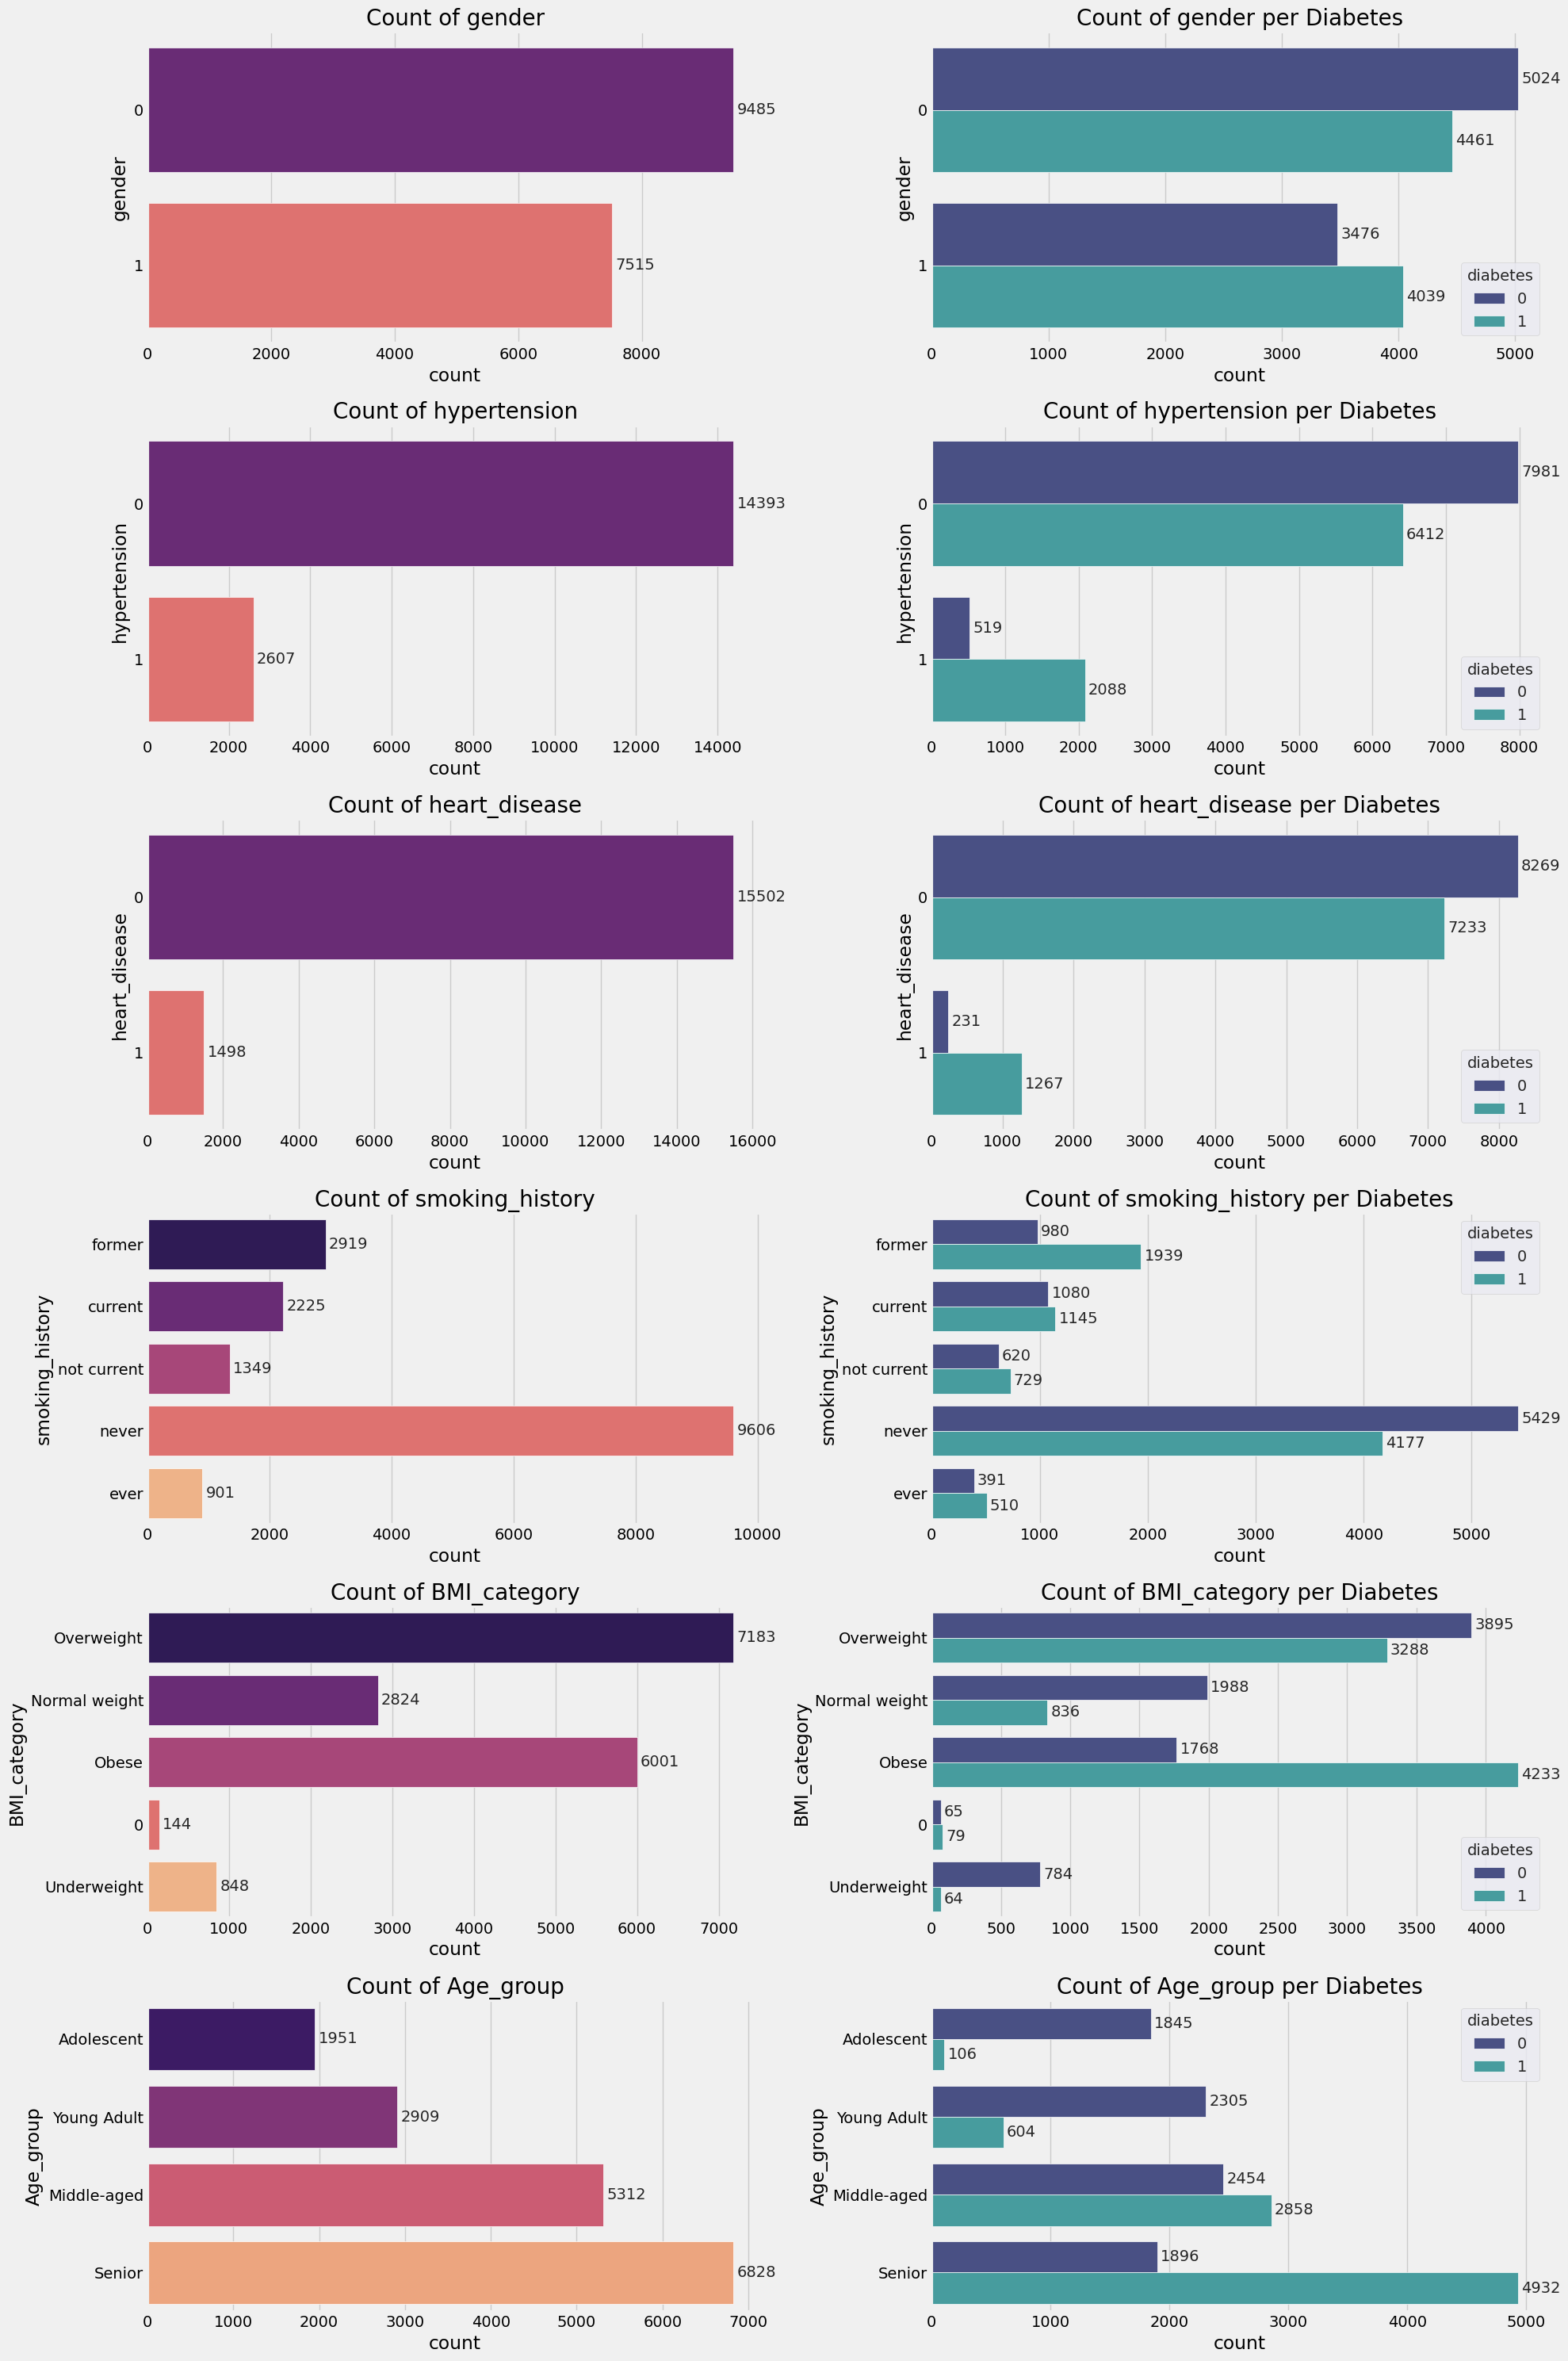

In [28]:
fig, axes = plt.subplots(6,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0

for col in categorical_columns:
    # Left side plot without hue
    sns.countplot(data=data, y=col, palette='magma', orient='h', ax=axes[idx][0]).set_title(f'Count of {col}', fontsize=20)
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container, padding=3)  # Add padding to avoid overlap

    # Right side plot with hue='diabetes'
    sns.countplot(data=data, y=col, palette='mako', orient='h', hue='diabetes', ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize=20)
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container, padding=3)  # Add padding to avoid overlap

    idx += 1

# Adjust the layout to prevent label overlap
plt.tight_layout()
plt.show()

### 4.3 numerical features

In [29]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

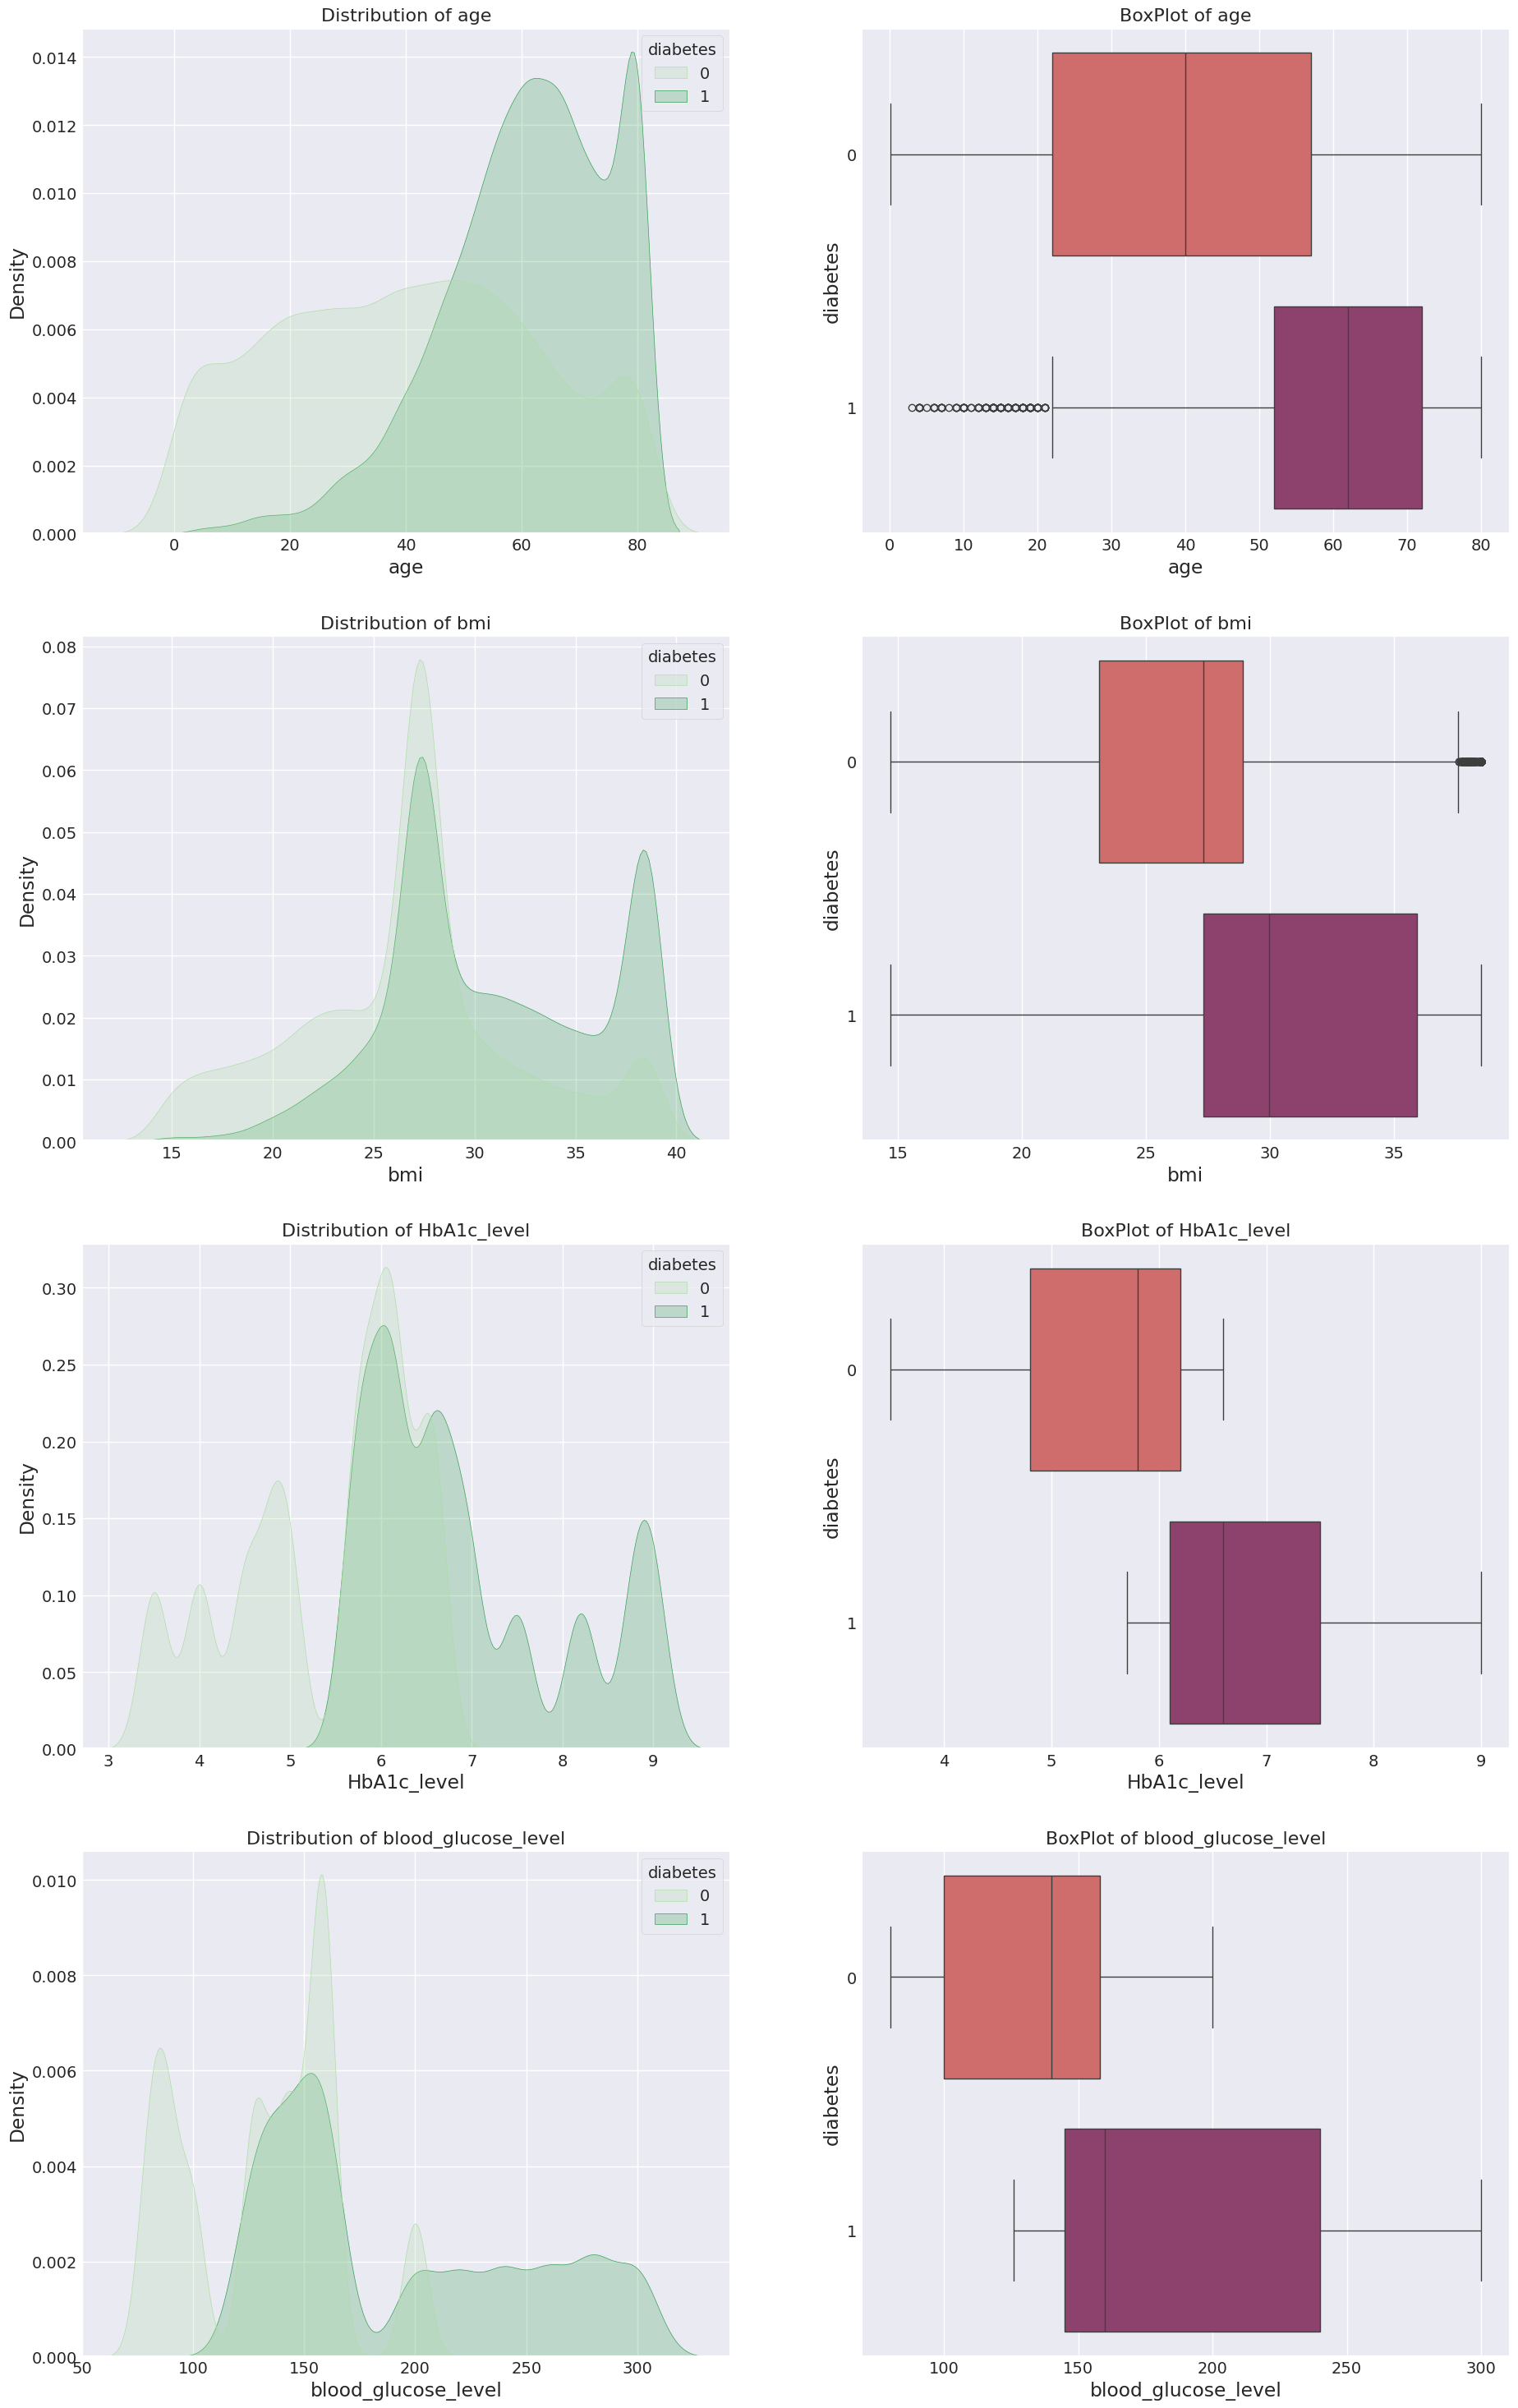

In [30]:
fig, axes = plt.subplots(4,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=data, x=col, palette='Greens',fill=True , hue='diabetes',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=data, x=col, palette='flare' , y='diabetes', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

### 4.4 choose meaningful features

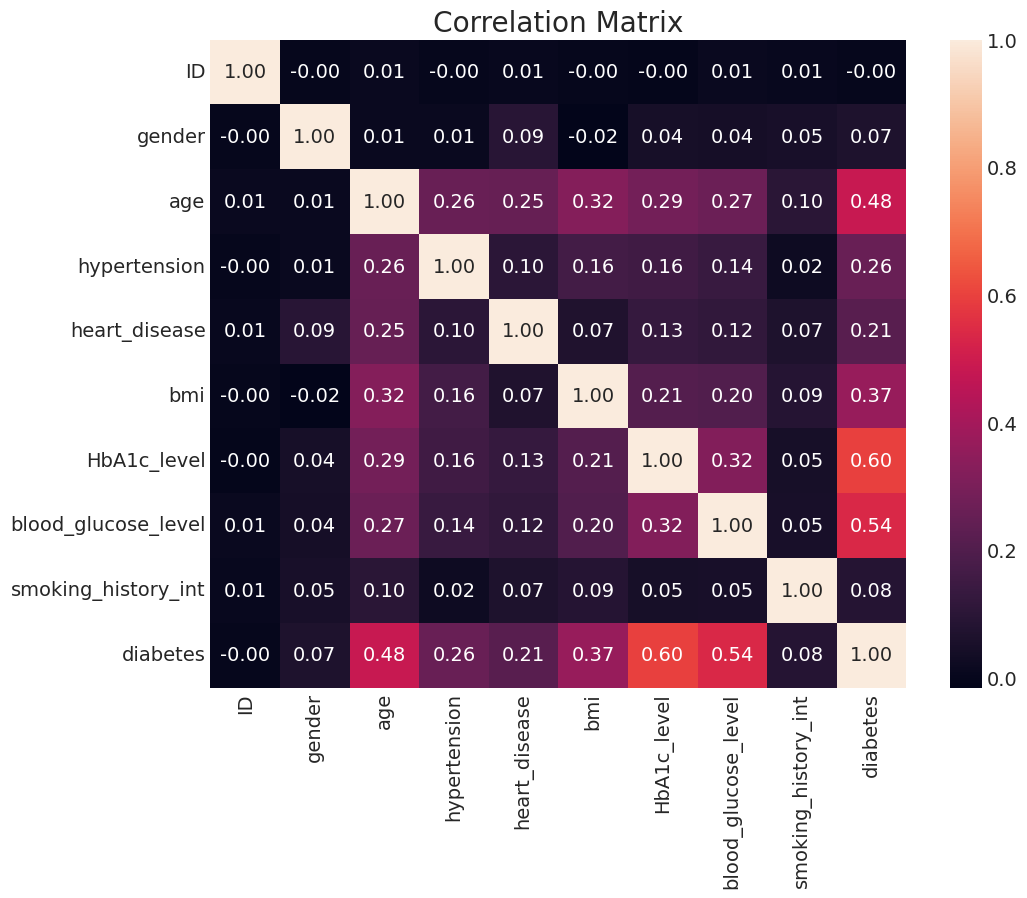

In [31]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix to understand the relationship between variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression     # ordinary least squares Linear Regression
from sklearn.model_selection import cross_val_score   # evaluate a score by cross-validation

# A simple linear regression with only one feature
X = data[['gender']].values                                 # attribute
y = data['diabetes'].values                                 # target variable

# linear regression class
slr = LinearRegression(fit_intercept=True,            # whether to calculate the intercept for this model (true by default, otherwise data is expected to be centered)
                       n_jobs=-1)                     # speedup computations by using multiple processors; -1 means use all processors
slr.fit(X, y)                                         # fit model to the data

print('Slope: %.3f' % slr.coef_[0])                   # estimated coefficients for the linear regression model
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.067
Intercept: 0.470


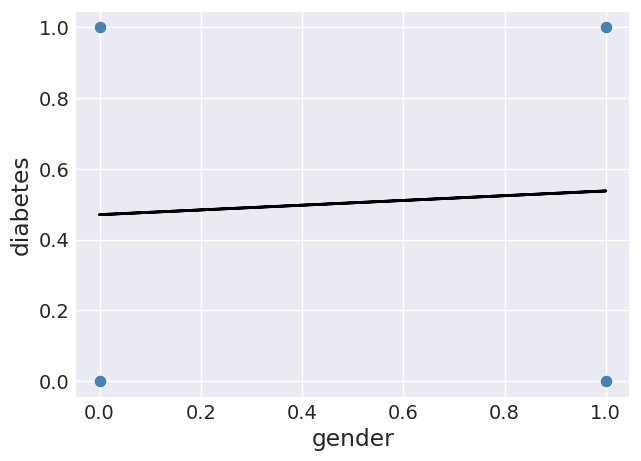

In [33]:
def lin_regplot(X, y, model):                                 # define plot function that takes as input X, y and model
    plt.scatter(X,                                            # a scatter plot of y vs x.
                y,
                c='steelblue',                                # aesthetic parameters
                edgecolor='white',
                s=80)                                         # the marker size in points**2
    plt.plot(X, model.predict(X), color='black', lw=2) #lw = line width
    return

lin_regplot(X, y, slr)       # Call the above function
plt.xlabel('gender')                    # set label for x axis
plt.ylabel('diabetes')                          # set label for y axis

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

### 4.4 correlation between features

# ML models

## Feature Engineering

From examining the correlation table, we are able to identify variables that are correlated with other variables to certain levels. Therefore, if we choose to include both variables, we should specify interactions. Meanwhile, we should also consider whether we need to transform some variables into polynomial functions and check if there are any skewed variables that need to be logarithmically transformed.

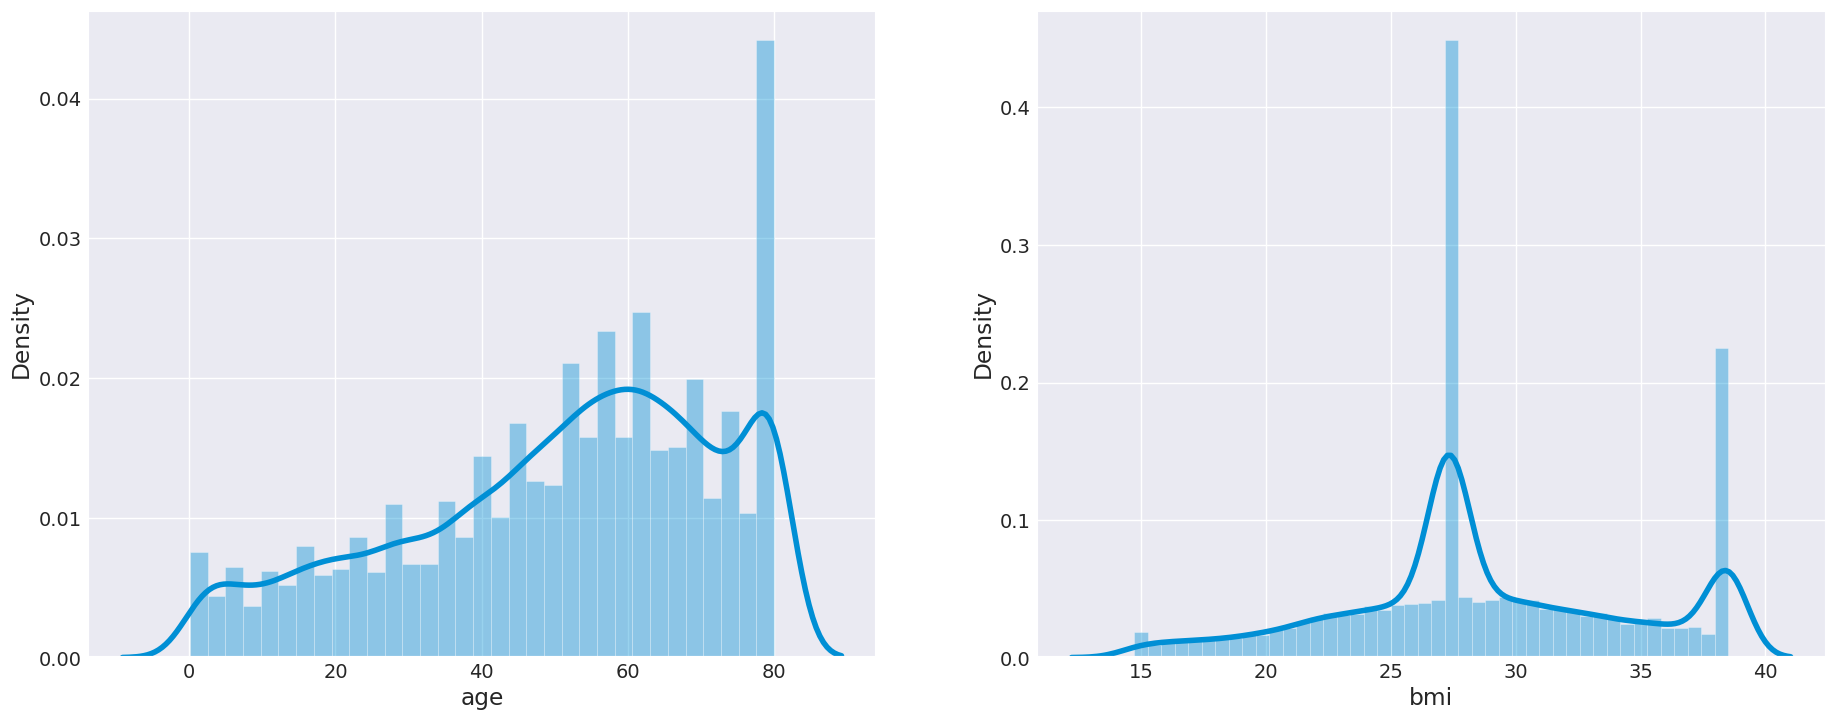

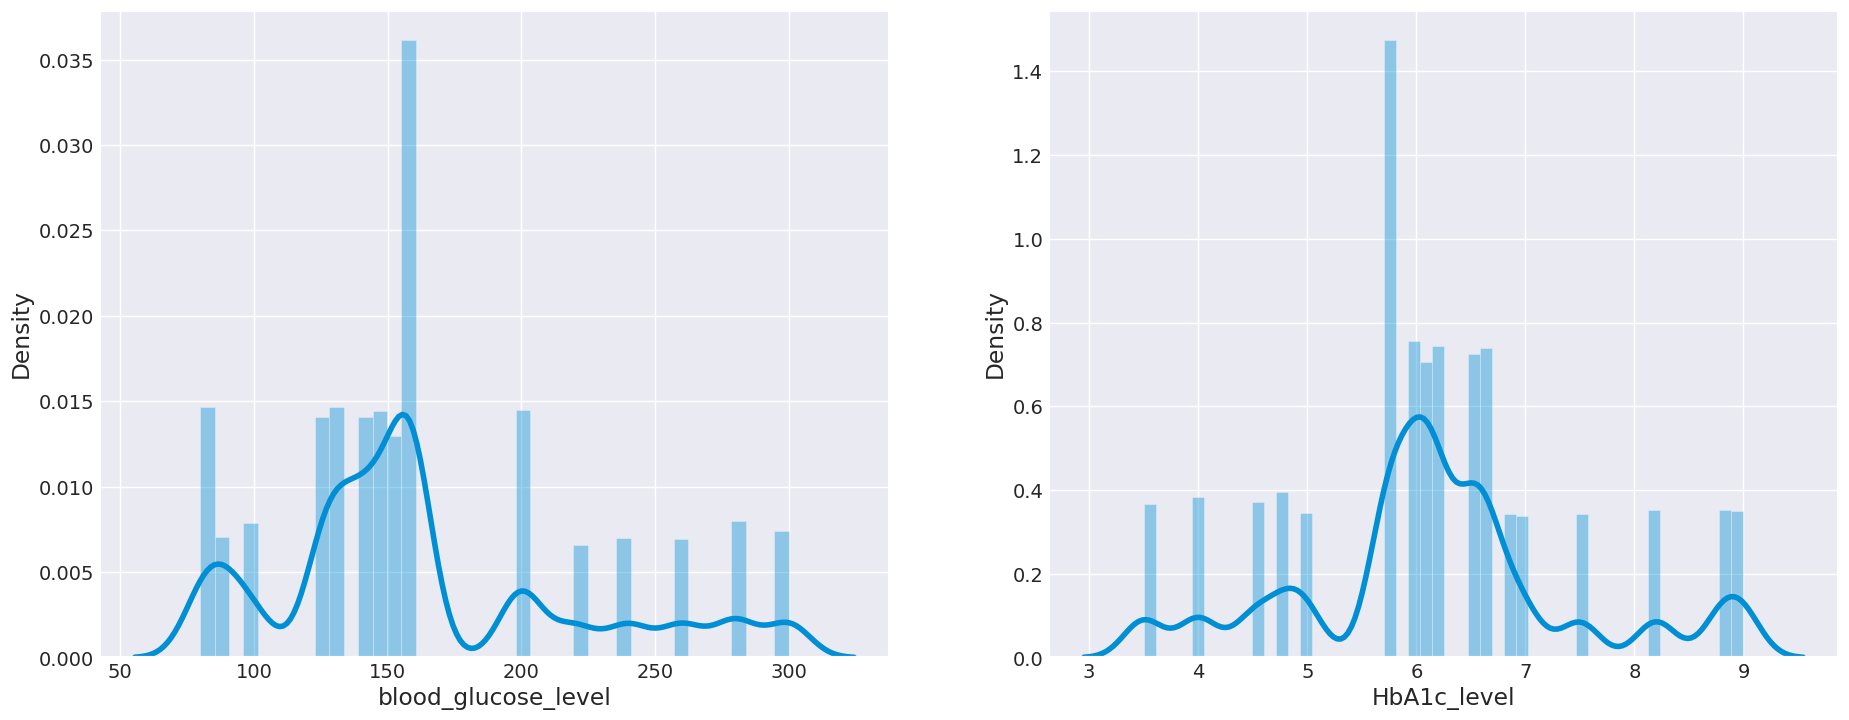

<Figure size 640x480 with 0 Axes>

In [34]:
numerical = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
i = 0

while i < 4:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  sns.distplot(data[numerical[i]])
  i += 1
  if i == 4:
    break
  plt.subplot(1, 2, 2)
  sns.distplot(data[numerical[i]])
  i += 1
  plt.show()

plt.savefig('2')

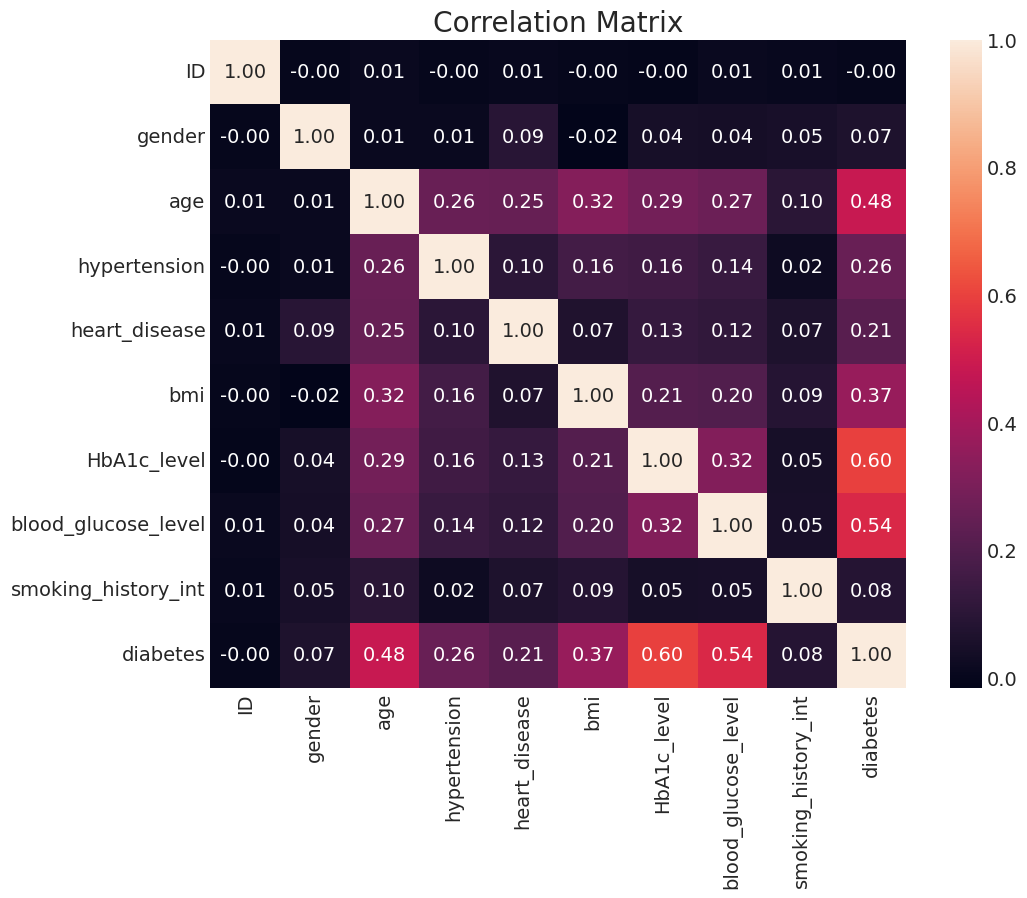

In [35]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix to understand the relationship between variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

SET UP DATA FOR MODELING

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer, recall_score
from sklearn.pipeline import Pipeline

# Apply the mapping to create a new column 'smoking_history_int'
smoking_mapping = {
    'never': 0,
    'former': 1,
    'not current': 2,
    'current': 3,
    'ever': 4
}
data['smoking_history'] = data['smoking_history'].map(smoking_mapping)

# Convert 'BMI_category' and 'Age_group' using one-hot encoding
# Create one-hot encoded columns for categorical features
data = pd.get_dummies(data, columns=['BMI_category', 'Age_group'], drop_first=True)

# Now select the numeric columns
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'bmi','smoking_history', 'HbA1c_level', 'blood_glucose_level'] +
         [col for col in data.columns if 'BMI_category_' in col or 'Age_group_' in col]]
y = data['diabetes']

# Scale the features for k-NN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up nested cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set metrics for evaluation
f1 = make_scorer(f1_score)
recall = make_scorer(recall_score)


## Model 1: Decision Tree

In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for Decision Tree
# Make scoring=recall if you want to see the recall metric
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_param_grid, scoring=f1, cv=inner_cv)
dt_grid.fit(X, y)

# Best parameters for Decision Tree
print("Best parameters for Decision Tree:", dt_grid.best_params_)
print(f"Best F1-score from GridSearchCV: {dt_grid.best_score_:.4f}")

# Nested cross-validation for Decision Tree
dt_nested_scores = cross_val_score(dt_grid, X, y, cv=outer_cv, scoring=f1)
print(f"Decision Tree Nested CV F1-Score: {dt_nested_scores.mean():.4f}")

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}
Best F1-score from GridSearchCV: 0.9044
Decision Tree Nested CV F1-Score: 0.9031


## Feature Selection + New round of feature Engineering Decision Tree

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_split = 20)

# Forward Selection
sfs_forward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring='neg_mean_squared_error', cv=10)
sfs_forward.fit(X_train, y_train)
forward_selected_features = X_train.columns[sfs_forward.get_support()]

# Backward Elimination
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring='neg_mean_squared_error', cv=10)
sfs_backward.fit(X_train, y_train)
backward_selected_features = X_train.columns[sfs_backward.get_support()]

# Print the results
print("Features selected by Forward Selection:", forward_selected_features.tolist())
print("Features selected by Backward Elimination:", backward_selected_features.tolist())

# Differences in selected features
features_difference = set(forward_selected_features).symmetric_difference(set(backward_selected_features))
print("\nDifferences in selected features:", features_difference)

# Train and evaluate models with the selected features
# Forward Selection Model
model_forward = DecisionTreeClassifier()
model_forward.fit(X_train[forward_selected_features], y_train)
y_pred_forward = model_forward.predict(X_test[forward_selected_features])
forward_mse = mean_squared_error(y_test, y_pred_forward)

# Backward Elimination Model
model_backward = DecisionTreeClassifier()
model_backward.fit(X_train[backward_selected_features], y_train)
y_pred_backward = model_backward.predict(X_test[backward_selected_features])
backward_mse = mean_squared_error(y_test, y_pred_backward)

print("\nForward Selection MSE on Test Set:", forward_mse)
print("Backward Elimination MSE on Test Set:", backward_mse)


Features selected by Forward Selection: ['gender', 'age', 'hypertension', 'HbA1c_level', 'blood_glucose_level', 'BMI_category_Normal weight', 'BMI_category_Obese']
Features selected by Backward Elimination: ['hypertension', 'HbA1c_level', 'blood_glucose_level', 'BMI_category_Obese', 'BMI_category_Overweight', 'Age_group_Young Adult', 'Age_group_Middle-aged', 'Age_group_Senior']

Differences in selected features: {'Age_group_Senior', 'Age_group_Middle-aged', 'age', 'BMI_category_Overweight', 'gender', 'BMI_category_Normal weight', 'Age_group_Young Adult'}

Forward Selection MSE on Test Set: 0.125
Backward Elimination MSE on Test Set: 0.10352941176470588


## Defining Interactions between age and all other variables included to avoid multicolinarity

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Define your feature set and interaction variables
variables = ['age', 'hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level', 'bmi']
target_variable = 'diabetes'

# Assume your DataFrame is called 'data'
X = data[variables]
y = data[target_variable]

# Create interaction terms between 'age' and other variables
X['age_bmi'] = X['age'] * X['bmi']
X['age_hypertension'] = X['age'] * X['hypertension']
X['age_heart_disease'] = X['age'] * X['heart_disease']
X['age_HbA1c_level'] = X['age'] * X['HbA1c_level']
X['age_blood_glucose_level'] = X['age'] * X['blood_glucose_level']

# Updated feature list with interaction terms
interaction_variables = ['age', 'bmi', 'hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level',
                         'age_bmi', 'age_hypertension', 'age_heart_disease', 'age_HbA1c_level', 'age_blood_glucose_level']

# Use only the selected variables and interactions for the model
X = X[interaction_variables]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
model = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_split = 20)

# Backward feature selection using SequentialFeatureSelector
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring='neg_mean_squared_error', cv=10)
sfs_backward.fit(X_train_scaled, y_train)

# Get the selected features
backward_selected_features = X_train.columns[sfs_backward.get_support()]

# Fit the logistic regression model with the selected features
X_train_selected = X_train_scaled[:, sfs_backward.get_support()]
X_test_selected = X_test_scaled[:, sfs_backward.get_support()]

# Fit the final model
model.fit(X_train_selected, y_train)

# Make predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

# Print classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Calculate the test MSE (based on predicted probabilities)
y_pred_proba_test = model.predict_proba(X_test_selected)[:, 1]  # We use probabilities of class '1'
mse_test = mean_squared_error(y_test, y_pred_proba_test)
print(f"Test MSE (Mean Squared Error): {mse_test:.4f}")

# Display the selected features
print("\nSelected Features:")
print(backward_selected_features)


Training Accuracy: 0.9115
Test Accuracy: 0.8982

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1687
           1       0.88      0.92      0.90      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

Test MSE (Mean Squared Error): 0.0656

Selected Features:
Index(['hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level',
       'age_bmi', 'age_hypertension'],
      dtype='object')


## Model 2: k-NN

In [40]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}
# Make scoring=recall if you want to see the recall metric
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, scoring=f1, cv=inner_cv)
knn_grid.fit(X_scaled, y)

# Best parameters for k-NN
print("\nBest parameters for k-NN:", knn_grid.best_params_)
print(f"Best F1-score from GridSearchCV (k-NN): {knn_grid.best_score_:.4f}")

# Nested cross-validation for k-NN
knn_nested_scores = cross_val_score(knn_grid, X_scaled, y, cv=outer_cv, scoring=f1)
print(f"k-NN Nested CV F1-Score: {knn_nested_scores.mean():.4f}")


Best parameters for k-NN: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best F1-score from GridSearchCV (k-NN): 0.8780
k-NN Nested CV F1-Score: 0.8789


## Feature Selection + Feature Engineering K-NN

In [41]:
from sklearn import neighbors

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = neighbors.KNeighborsClassifier()

# Forward Selection
sfs_forward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring='neg_mean_squared_error', cv=10)
sfs_forward.fit(X_train, y_train)
forward_selected_features = X_train.columns[sfs_forward.get_support()]

# Backward Elimination
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring='neg_mean_squared_error', cv=10)
sfs_backward.fit(X_train, y_train)
backward_selected_features = X_train.columns[sfs_backward.get_support()]

# Print the results
print("Features selected by Forward Selection:", forward_selected_features.tolist())
print("Features selected by Backward Elimination:", backward_selected_features.tolist())

# Differences in selected features
features_difference = set(forward_selected_features).symmetric_difference(set(backward_selected_features))
print("\nDifferences in selected features:", features_difference)

# Train and evaluate models with the selected features
# Forward Selection Model
model_forward = neighbors.KNeighborsClassifier(n_neighbors = 9, p=1,weights='uniform')
model_forward.fit(X_train[forward_selected_features], y_train)
y_pred_forward = model_forward.predict(X_test[forward_selected_features])
forward_mse = mean_squared_error(y_test, y_pred_forward)

# Backward Elimination Model
model_backward = neighbors.KNeighborsClassifier(n_neighbors = 9, p=1,weights='uniform')
model_backward.fit(X_train[backward_selected_features], y_train)
y_pred_backward = model_backward.predict(X_test[backward_selected_features])
backward_mse = mean_squared_error(y_test, y_pred_backward)

print("\nForward Selection MSE on Test Set:", forward_mse)
print("Backward Elimination MSE on Test Set:", backward_mse)

# A different approach from business stand points is to go over the correlation table to see how each variable interacts with other variables
# This time we trusted the model. However, we can clearly see there can be improvements in the future.

Features selected by Forward Selection: ['age', 'hypertension', 'HbA1c_level', 'blood_glucose_level', 'age_blood_glucose_level']
Features selected by Backward Elimination: ['age', 'bmi', 'blood_glucose_level', 'age_hypertension', 'age_heart_disease', 'age_HbA1c_level']

Differences in selected features: {'age_hypertension', 'age_blood_glucose_level', 'age_heart_disease', 'age_HbA1c_level', 'HbA1c_level', 'bmi', 'hypertension'}

Forward Selection MSE on Test Set: 0.16176470588235295
Backward Elimination MSE on Test Set: 0.11529411764705882


## Adding Interactions according to business understanding and avoid multicolinarity

In [42]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Define your feature set and interaction variables
variables = ['age', 'bmi', 'blood_glucose_level', 'hypertension', 'heart_disease', 'HbA1c_level']
target_variable = 'diabetes'

# Assume your DataFrame is called 'data'
X = data[variables]
y = data[target_variable]

# Create interaction terms between 'age' and other variables
X['age_hypertension'] = X['age'] * X['hypertension']
X['age_heart_disease'] = X['age'] * X['heart_disease']
X['age_HbA1c_level'] = X['age'] * X['HbA1c_level']

# Updated feature list with interaction terms
interaction_variables = ['age', 'bmi', 'blood_glucose_level', 'age_hypertension', 'age_heart_disease', 'age_HbA1c_level']

# Use only the selected variables and interactions for the model
X = X[interaction_variables]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize K-NN model
model = neighbors.KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform')

# Backward feature selection using SequentialFeatureSelector
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring='neg_mean_squared_error', cv=10)
sfs_backward.fit(X_train_scaled, y_train)

# Get the selected features
backward_selected_features = X_train.columns[sfs_backward.get_support()]

# Fit the K-NN model with the selected features
X_train_selected = X_train_scaled[:, sfs_backward.get_support()]
X_test_selected = X_test_scaled[:, sfs_backward.get_support()]

# Fit the final model
model.fit(X_train_selected, y_train)

# Make predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

# Print classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Calculate the test MSE (based on predicted probabilities)
y_pred_proba_test = model.predict_proba(X_test_selected)[:, 1]  # We use probabilities of class '1'
mse_test = mean_squared_error(y_test, y_pred_proba_test)
print(f"Test MSE (Mean Squared Error): {mse_test:.4f}")

# Display the selected features
print("\nSelected Features:")
print(backward_selected_features)


Training Accuracy: 0.9056
Test Accuracy: 0.8682

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1687
           1       0.85      0.90      0.87      1713

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400

Test MSE (Mean Squared Error): 0.0828

Selected Features:
Index(['age', 'blood_glucose_level', 'age_HbA1c_level'], dtype='object')


## Model 3: Logistic Regression

In [43]:
logreg = LogisticRegression(random_state=42, max_iter=10000)
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 or L2 regularization type
    'solver': ['liblinear', 'saga']  # Solvers for L1 and L2 regularization
}
# Make scoring=recall if you want to see the recall metric
logreg_grid = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, scoring=f1, cv=inner_cv)
logreg_grid.fit(X_scaled, y)

# Best parameters for Logistic Regression
print("\nBest parameters for Logistic Regression:", logreg_grid.best_params_)
print(f"Best F1-score from GridSearchCV (Logistic Regression): {logreg_grid.best_score_:.4f}")

# Nested cross-validation for Logistic Regression
logreg_nested_scores = cross_val_score(logreg_grid, X_scaled, y, cv=outer_cv, scoring=f1)
print(f"Logistic Regression Nested CV F1-Score: {logreg_nested_scores.mean():.4f}")


Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-score from GridSearchCV (Logistic Regression): 0.8845
Logistic Regression Nested CV F1-Score: 0.8838


## Feature Selection + Feature Engineering Logistic Regression


In [44]:
from sklearn import linear_model

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = linear_model.LogisticRegression()
# Forward Selection
sfs_forward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring='neg_mean_squared_error', cv=10)
sfs_forward.fit(X_train, y_train)
forward_selected_features = X_train.columns[sfs_forward.get_support()]

# Backward Elimination
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring='neg_mean_squared_error', cv=10)
sfs_backward.fit(X_train, y_train)
backward_selected_features = X_train.columns[sfs_backward.get_support()]

# Print the results
print("Features selected by Forward Selection:", forward_selected_features.tolist())
print("Features selected by Backward Elimination:", backward_selected_features.tolist())

# Differences in selected features
features_difference = set(forward_selected_features).symmetric_difference(set(backward_selected_features))
print("\nDifferences in selected features:", features_difference)

# Train and evaluate models with the selected features
# Forward Selection Model
model_forward = linear_model.LogisticRegression(penalty = 'l2', C = 0.01, solver = 'saga' )
model_forward.fit(X_train[forward_selected_features], y_train)
y_pred_forward = model_forward.predict(X_test[forward_selected_features])
forward_mse = mean_squared_error(y_test, y_pred_forward)

# Backward Elimination Model
model_backward = linear_model.LogisticRegression(penalty = 'l2', C = 0.01, solver = 'saga' )
model_backward.fit(X_train[backward_selected_features], y_train)
y_pred_backward = model_backward.predict(X_test[backward_selected_features])
backward_mse = mean_squared_error(y_test, y_pred_backward)

print("\nForward Selection MSE on Test Set:", forward_mse)
print("Backward Elimination MSE on Test Set:", backward_mse)

# A different approach from business stand points is to go over the correlation table to see how each variable interacts with other variables
# This time we trusted the model. However, we can clearly see there can be improvements in the future.

Features selected by Forward Selection: ['age', 'blood_glucose_level', 'age_HbA1c_level']
Features selected by Backward Elimination: ['age', 'blood_glucose_level', 'age_HbA1c_level']

Differences in selected features: set()

Forward Selection MSE on Test Set: 0.2605882352941176
Backward Elimination MSE on Test Set: 0.2605882352941176


## BEST MODEL FOR DEPLOYMENT

Confusion Matrix:
[[7539  961]
 [ 548 7952]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      8500
           1       0.89      0.94      0.91      8500

    accuracy                           0.91     17000
   macro avg       0.91      0.91      0.91     17000
weighted avg       0.91      0.91      0.91     17000

Accuracy: 0.9112


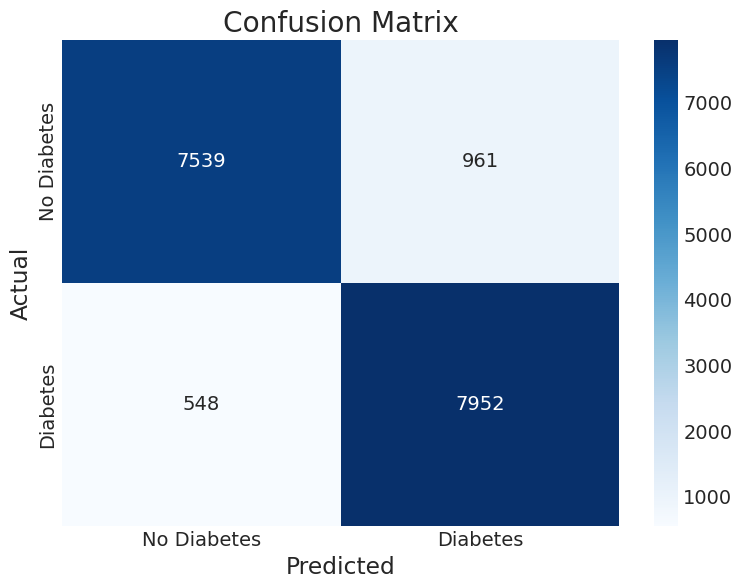

In [45]:
# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Best decision tree model with optimal parameters
best_dt_model_backward = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_split = 20)

# Define your feature set and interaction variables
variables = ['age', 'hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level', 'bmi']
target_variable = 'diabetes'

# Assume your DataFrame is called 'data'
X_new = data[variables]
y_new = data[target_variable]

# Create interaction terms between 'age' and other variables
X_new['age_bmi'] = X_new['age'] * X_new['bmi']
X_new['age_hypertension'] = X_new['age'] * X_new['hypertension']
X_new['age_heart_disease'] = X_new['age'] * X_new['heart_disease']
X_new['age_HbA1c_level'] = X_new['age'] * X_new['HbA1c_level']
X_new['age_blood_glucose_level'] = X_new['age'] * X_new['blood_glucose_level']

# Updated feature list with interaction terms
interaction_variables = ['age', 'bmi', 'hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level',
                         'age_bmi', 'age_hypertension', 'age_heart_disease', 'age_HbA1c_level', 'age_blood_glucose_level']

# Use only the selected variables and interactions for the model
X_new = X_new[interaction_variables]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the entire dataset
best_dt_model_backward.fit(X_new, y_new)

# Make predictions
y_pred = best_dt_model_backward.predict(X_new)

# Confusion matrix
conf_matrix = confusion_matrix(y_new, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for precision, recall, f1-score, and accuracy
class_report = classification_report(y_new, y_pred)
print("Classification Report:")
print(class_report)

# Accuracy score
accuracy = accuracy_score(y_new, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# You can also visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
